In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [76]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
dataset_path = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"  

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [78]:
IMG_SIZE = (224, 224)  # Image size

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=30,  # Random rotation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for validation & test

# Load the images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'  # Since it’s a multi-class classification problem
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [79]:
print(train_generator.class_indices)

{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [81]:
# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Helps prevent overfitting
    Dense(11, activation='softmax')  # 11 classes (multi-class classification)
])

In [82]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)      0

In [84]:
# Train the model
history = cnn_model.fit(
    train_generator,
    epochs=10,  # Can be adjusted
    validation_data=val_generator
)

Epoch 1/10
195/195 [==============================] - 55s 280ms/step - loss: 1.3371 - accuracy: 0.5271 - val_loss: 0.9198 - val_accuracy: 0.7051
Epoch 2/10
195/195 [==============================] - 51s 261ms/step - loss: 1.0278 - accuracy: 0.6368 - val_loss: 0.6095 - val_accuracy: 0.8104
Epoch 3/10
195/195 [==============================] - 51s 260ms/step - loss: 0.8139 - accuracy: 0.6975 - val_loss: 0.5197 - val_accuracy: 0.8269
Epoch 4/10
195/195 [==============================] - 102s 525ms/step - loss: 0.7784 - accuracy: 0.7089 - val_loss: 0.6847 - val_accuracy: 0.7317
Epoch 5/10
195/195 [==============================] - 50s 258ms/step - loss: 0.6316 - accuracy: 0.7714 - val_loss: 0.3369 - val_accuracy: 0.8965
Epoch 6/10
195/195 [==============================] - 51s 260ms/step - loss: 0.6000 - accuracy: 0.7865 - val_loss: 0.3402 - val_accuracy: 0.8883
Epoch 7/10
195/195 [==============================] - 51s 261ms/step - loss: 0.5233 - accuracy: 0.8169 - val_loss: 0.2164 - val_a

In [85]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

100/100 [==============================] - 5s 54ms/step - loss: 0.1889 - accuracy: 0.9454
Test Accuracy: 0.9454


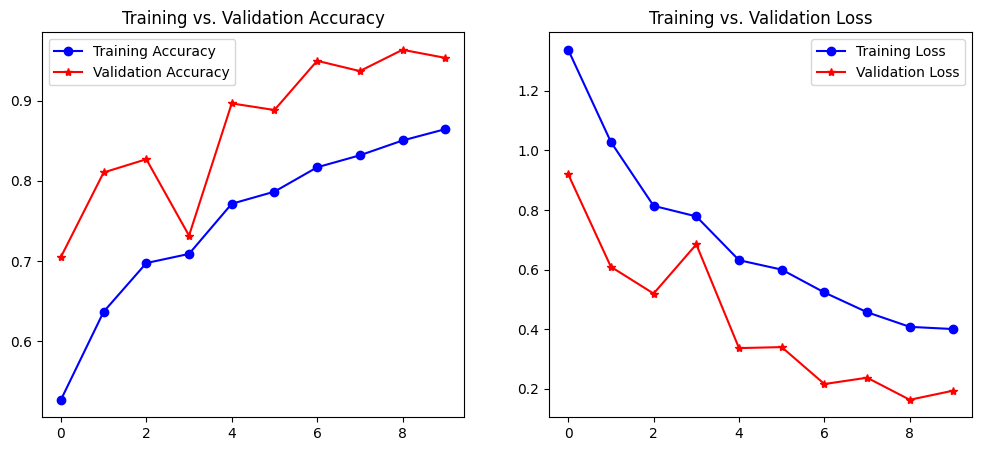

In [86]:
import matplotlib.pyplot as plt

# Extract values from history
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(train_acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, "bo-", label="Training Accuracy")
plt.plot(epochs, val_acc, "r*-", label="Validation Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "r*-", label="Validation Loss")
plt.title("Training vs. Validation Loss")
plt.legend()

plt.show()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test data
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # Get true labels

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

100/100 [==============================] - 5s 49ms/step
Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.92      0.99      0.95       298
   fish sea_food gilt_head_bream       0.90      0.88      0.89       305
   fish sea_food hourse_mackerel       0.97      0.99      0.98       286
        fish sea_food red_mullet       0.94      1.00      0.97       291
     fish sea_food red_sea_bream       0.89      0.87      0.88       273
          fish sea_food sea_bass       0.96      0.95      0.96       327
            fish sea_food shrimp       0.98      0.96      0.97       289
fish sea_food striped_red_mullet       0.96      0.83      0.89       293
             fish sea_food trout       0.95      1.00      0.98       292

                        accurac

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [88]:
cnn_model.save("fish_classification_cnn_model.h5")  # Save Model

In [91]:
cnn_model.save("fish_classification_cnn_model1.h5", include_optimizer=False)


Pre-trained models

#Resnet50 model

In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.1


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import classification_report

In [3]:
# Set Dataset Paths
dataset_path = (
    "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"
)
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [ ]:
# Define Image Parameters
batch_size = 32
img_size = (224, 224)

#  Data Augmentation & Rescaling (for Training)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

#  Only Rescaling for Validation & Test Data
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

#  Load images using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="sparse"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="sparse"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False,
)

# Store class names for evaluation
class_names = list(train_generator.class_indices.keys())

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [5]:
#  Load Pretrained ResNet50 (Exclude Top Layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers initially

In [6]:
#  Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation="softmax")(x)  # 11 classes

In [7]:
#  Create Final Model
model = Model(inputs=base_model.input, outputs=output_layer)

In [8]:
#  Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [9]:
import PIL
print(PIL.__version__)


11.1.0


In [10]:
epochs = 10 
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10
195/195 [==============================] - 117s 510ms/step - loss: 2.4090 - accuracy: 0.1433 - val_loss: 2.2655 - val_accuracy: 0.1712
Epoch 2/10
195/195 [==============================] - 58s 297ms/step - loss: 2.2810 - accuracy: 0.1751 - val_loss: 2.2318 - val_accuracy: 0.1667
Epoch 3/10
195/195 [==============================] - 59s 300ms/step - loss: 2.2481 - accuracy: 0.1883 - val_loss: 2.2031 - val_accuracy: 0.1676
Epoch 4/10
195/195 [==============================] - 62s 319ms/step - loss: 2.2247 - accuracy: 0.1915 - val_loss: 2.1775 - val_accuracy: 0.2161
Epoch 5/10
195/195 [==============================] - 63s 324ms/step - loss: 2.2055 - accuracy: 0.1990 - val_loss: 2.1518 - val_accuracy: 0.2262
Epoch 6/10
195/195 [==============================] - 63s 320ms/step - loss: 2.1844 - accuracy: 0.2027 - val_loss: 2.1379 - val_accuracy: 0.1722
Epoch 7/10
195/195 [==============================] - 61s 312ms/step - loss: 2.1639 - accuracy: 0.2154 - val_loss: 2.1212 - val_a

In [11]:
#  Evaluate Model on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

100/100 [==============================] - 20s 197ms/step - loss: 2.0691 - accuracy: 0.2334
Test Accuracy: 0.2334


In [12]:
#  Generate Classification Report
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Get predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

#  Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

100/100 [==============================] - 18s 173ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.25      0.78      0.38       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.24      0.04      0.07       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.11      0.00      0.01       286
        fish sea_food red_mullet       0.32      0.40      0.35       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.40      0.01      0.01       327
            fish sea_food shrimp       0.21      0.24      0.22       289
fish sea_food striped_red_mullet       0.67      0.02      0.04       293
             fish sea_food trout       0.16      0.47      0.24       292

                        accuracy                    

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [13]:
#Fine-Tune (Unfreeze Some Layers)
base_model.trainable = True
for layer in base_model.layers[:140]:  # Keep first 140 layers frozen
    layer.trainable = False

In [14]:
#  Recompile Model for Fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.00001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [15]:
#  Train Model Again (Fine-tuning)
history_finetune = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
195/195 [==============================] - 70s 329ms/step - loss: 2.3713 - accuracy: 0.2517 - val_loss: 2.8243 - val_accuracy: 0.2225
Epoch 2/5
195/195 [==============================] - 60s 305ms/step - loss: 1.8397 - accuracy: 0.3455 - val_loss: 1.9698 - val_accuracy: 0.2995
Epoch 3/5
195/195 [==============================] - 60s 309ms/step - loss: 1.7361 - accuracy: 0.3904 - val_loss: 1.5142 - val_accuracy: 0.5165
Epoch 4/5
195/195 [==============================] - 117s 600ms/step - loss: 1.6186 - accuracy: 0.4405 - val_loss: 1.4653 - val_accuracy: 0.5430
Epoch 5/5
195/195 [==============================] - 154s 789ms/step - loss: 1.5021 - accuracy: 0.4776 - val_loss: 1.2701 - val_accuracy: 0.5852


In [16]:
#  Evaluate Fine-Tuned Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Fine-Tuned Test Accuracy: {test_acc:.4f}")

100/100 [==============================] - 19s 192ms/step - loss: 1.2548 - accuracy: 0.5808
Fine-Tuned Test Accuracy: 0.5808


In [20]:
#  Generate Classification Report
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Get predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

#  Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

100/100 [==============================] - 17s 170ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.85      0.97      0.90       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.54      0.72      0.62       298
   fish sea_food gilt_head_bream       0.65      0.18      0.28       305
   fish sea_food hourse_mackerel       0.43      0.65      0.52       286
        fish sea_food red_mullet       0.39      0.68      0.49       291
     fish sea_food red_sea_bream       0.69      0.56      0.62       273
          fish sea_food sea_bass       0.63      0.28      0.38       327
            fish sea_food shrimp       0.48      0.76      0.59       289
fish sea_food striped_red_mullet       0.27      0.04      0.07       293
             fish sea_food trout       0.72      0.75      0.74       292

                        accuracy                    

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [19]:
#  Save Model
model.save("D:/Project/Multiclass_project/Model/resnet50_fish_classifier.h5")
print("Model saved as resnet50_fish_classifier.h5")

Model saved as resnet50_fish_classifier.h5


VGG16 model

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Load the VGG16 model with pre-trained weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [42]:
# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(11, activation='softmax') (x) # Assuming 11 classes

In [44]:
model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
dataset_path = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"  

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [47]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=8, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=8, class_mode='categorical')


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [48]:
print("y_true shape:", train_generator[0][1].shape)
print("y_pred shape:", model.predict(train_generator[0][0]).shape)


y_true shape: (8, 11)
1/1 [==============================] - 0s 295ms/step
y_pred shape: (8, 11)


In [50]:
# Train Model

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stopping])

Epoch 1/10
779/779 [==============================] - 86s 110ms/step - loss: 0.2822 - accuracy: 0.9012 - val_loss: 0.2331 - val_accuracy: 0.9167
Epoch 2/10
779/779 [==============================] - 89s 114ms/step - loss: 0.2661 - accuracy: 0.9115 - val_loss: 0.1360 - val_accuracy: 0.9570
Epoch 3/10
779/779 [==============================] - 89s 114ms/step - loss: 0.2375 - accuracy: 0.9202 - val_loss: 0.1483 - val_accuracy: 0.9496
Epoch 4/10
779/779 [==============================] - 86s 110ms/step - loss: 0.2349 - accuracy: 0.9210 - val_loss: 0.1424 - val_accuracy: 0.9432
Epoch 5/10
779/779 [==============================] - 90s 116ms/step - loss: 0.2113 - accuracy: 0.9319 - val_loss: 0.1088 - val_accuracy: 0.9570
Epoch 6/10
779/779 [==============================] - 87s 112ms/step - loss: 0.1954 - accuracy: 0.9335 - val_loss: 0.1234 - val_accuracy: 0.9570
Epoch 7/10
779/779 [==============================] - 90s 116ms/step - loss: 0.2030 - accuracy: 0.9314 - val_loss: 0.0869 - val_ac

In [52]:
test_generator = val_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=8, class_mode='categorical', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

Found 3187 images belonging to 11 classes.
399/399 [==============================] - 39s 98ms/step - loss: 0.0577 - accuracy: 0.9837
Test Accuracy: 0.9837


In [53]:
#  Generate Classification Report
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Get predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

#  Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

399/399 [==============================] - 29s 73ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.96      1.00      0.98       298
   fish sea_food gilt_head_bream       0.99      0.98      0.99       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       0.98      0.99      0.98       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       1.00      0.98      0.99       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.95      0.97       293
             fish sea_food trout       0.96      1.00      0.98       292

                        accuracy                     

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [56]:
# from sklearn.metrics import classification_report, confusion_matrix
# # Confusion Matrix
# cm = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

NameError: name 'plt' is not defined

In [59]:
# Unfreeze last few layers for fine-tuning
for layer in base_model.layers[:-4]:  # Freezing all layers except last 4
    layer.trainable = False

In [60]:
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [61]:
#  Train Model Again (Fine-tuning)
history_finetune = model.fit(train_generator, validation_data=val_generator, epochs=5)

Epoch 1/5
779/779 [==============================] - 70s 89ms/step - loss: 0.1132 - accuracy: 0.9624 - val_loss: 0.0749 - val_accuracy: 0.9762
Epoch 2/5
779/779 [==============================] - 69s 89ms/step - loss: 0.0947 - accuracy: 0.9676 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 3/5
779/779 [==============================] - 69s 89ms/step - loss: 0.0844 - accuracy: 0.9733 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 4/5
779/779 [==============================] - 69s 88ms/step - loss: 0.0784 - accuracy: 0.9745 - val_loss: 0.0691 - val_accuracy: 0.9780
Epoch 5/5
779/779 [==============================] - 69s 88ms/step - loss: 0.0769 - accuracy: 0.9745 - val_loss: 0.0680 - val_accuracy: 0.9771


In [62]:
#  Evaluate Fine-Tuned Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Fine-Tuned Test Accuracy: {test_acc:.4f}")

399/399 [==============================] - 30s 75ms/step - loss: 0.0427 - accuracy: 0.9881
Fine-Tuned Test Accuracy: 0.9881


In [63]:
#  Generate Classification Report
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Get predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

#  Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

399/399 [==============================] - 29s 72ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.15      0.27        13
   fish sea_food black_sea_sprat       0.98      1.00      0.99       298
   fish sea_food gilt_head_bream       0.99      0.99      0.99       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       0.99      0.99      0.99       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       1.00      0.99      0.99       327
            fish sea_food shrimp       0.99      1.00      0.99       289
fish sea_food striped_red_mullet       0.98      0.96      0.97       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                     

In [64]:
# Save the model
model.save("D:/Project/Multiclass_project/Model/VGG16_fish_classifier.h5")

Mobilenet model

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

17225924/17225924 [==============================] - 5s 0us/step


In [4]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
import os
dataset_path = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"  

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [10]:
# Train model
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stopping])

Epoch 1/10
195/195 [==============================] - 138s 643ms/step - loss: 0.7857 - accuracy: 0.7452 - val_loss: 0.1509 - val_accuracy: 0.9679
Epoch 2/10
195/195 [==============================] - 117s 597ms/step - loss: 0.2243 - accuracy: 0.9317 - val_loss: 0.0610 - val_accuracy: 0.9826
Epoch 3/10
195/195 [==============================] - 110s 564ms/step - loss: 0.1606 - accuracy: 0.9486 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 4/10
195/195 [==============================] - 70s 357ms/step - loss: 0.1258 - accuracy: 0.9600 - val_loss: 0.0378 - val_accuracy: 0.9872
Epoch 5/10
195/195 [==============================] - 62s 318ms/step - loss: 0.1035 - accuracy: 0.9643 - val_loss: 0.0290 - val_accuracy: 0.9899
Epoch 6/10
195/195 [==============================] - 62s 316ms/step - loss: 0.0872 - accuracy: 0.9706 - val_loss: 0.0169 - val_accuracy: 0.9963
Epoch 7/10
195/195 [==============================] - 62s 318ms/step - loss: 0.0877 - accuracy: 0.9706 - val_loss: 0.0224 - val

In [11]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

100/100 [==============================] - 7s 67ms/step - loss: 0.0107 - accuracy: 0.9975
Test Accuracy: 0.9975


In [13]:
class_names = list(test_generator.class_indices.keys())

In [14]:
#  Generate Classification Report
y_true = test_generator.classes  # True labels from test set
y_pred_probs = model.predict(test_generator)  # Get predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

#  Print Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))

100/100 [==============================] - 9s 85ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.69      0.82        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      0.99       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                      

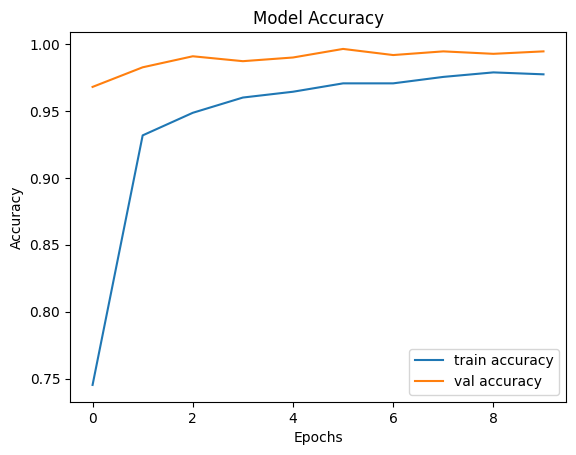

In [16]:
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

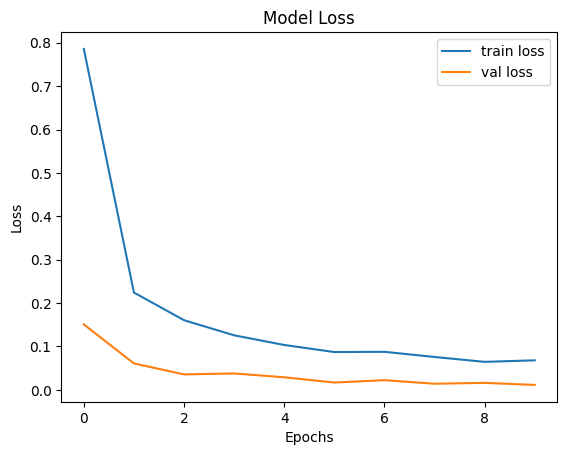

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Save the model
model.save("D:/Project/Multiclass_project/Model/mobilenet_fish_classifier.h5")

Inception V3

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix     
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# load Inceptionv3 mdoel
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [23]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(11, activation='softmax')(x)

In [26]:
inception_model = Model(inputs=base_model.input, outputs=out_layer)
inception_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=30,  # Random rotation
    zoom_range=0.2,  # Random zoom
   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
import os
dataset_path = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"  

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [51]:
history = inception_model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
195/195 [==============================] - 61s 295ms/step - loss: 0.8613 - accuracy: 0.7123 - val_loss: 0.2646 - val_accuracy: 0.9368
Epoch 2/10
195/195 [==============================] - 56s 288ms/step - loss: 0.3885 - accuracy: 0.8749 - val_loss: 0.1898 - val_accuracy: 0.9368
Epoch 3/10
195/195 [==============================] - 55s 284ms/step - loss: 0.3178 - accuracy: 0.8970 - val_loss: 0.1380 - val_accuracy: 0.9579
Epoch 4/10
195/195 [==============================] - 55s 281ms/step - loss: 0.2641 - accuracy: 0.9155 - val_loss: 0.1103 - val_accuracy: 0.9661
Epoch 5/10
195/195 [==============================] - 55s 282ms/step - loss: 0.2285 - accuracy: 0.9245 - val_loss: 0.1011 - val_accuracy: 0.9679
Epoch 6/10
195/195 [==============================] - 57s 289ms/step - loss: 0.2055 - accuracy: 0.9287 - val_loss: 0.0842 - val_accuracy: 0.9734
Epoch 7/10
195/195 [==============================] - 54s 276ms/step - loss: 0.2007 - accuracy: 0.9325 - val_loss: 0.0897 - val_ac

In [52]:
test_loss, test_acc = inception_model.evaluate(test_generator)
print(f"test_accuracy: {test_acc:.4f}")

100/100 [==============================] - 12s 123ms/step - loss: 0.0693 - accuracy: 0.9752
test_accuracy: 0.9752


In [53]:
# Classification Report & Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(inception_model.predict(test_generator), axis=1)
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

100/100 [==============================] - 12s 117ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.97      1.00      0.98       520
                animal fish bass       1.00      0.08      0.14        13
   fish sea_food black_sea_sprat       0.98      1.00      0.99       298
   fish sea_food gilt_head_bream       0.99      0.99      0.99       305
   fish sea_food hourse_mackerel       0.98      1.00      0.99       286
        fish sea_food red_mullet       0.90      1.00      0.95       291
     fish sea_food red_sea_bream       1.00      0.98      0.99       273
          fish sea_food sea_bass       0.99      0.97      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.86      0.92       293
             fish sea_food trout       0.98      0.99      0.98       292

                        accuracy                    

In [54]:
# Save the model
model.save("D:/Project/Multiclass_project/Model/InceptionV3_fish_classifier.h5")

EfficientnetB0

In [55]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [56]:
#Load model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [57]:
#add custom layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(11, activation='softmax')(x)

In [58]:
efficientnetB0_model = Model(inputs=base_model.input, outputs=out_layer)
efficientnetB0_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
#datagenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=0.25, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [60]:
import os
dataset_path = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data"  

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

In [61]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [62]:
history = efficientnetB0_model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
195/195 [==============================] - 60s 289ms/step - loss: 2.3465 - accuracy: 0.1467 - val_loss: 2.3212 - val_accuracy: 0.1712
Epoch 2/10
195/195 [==============================] - 54s 274ms/step - loss: 2.3243 - accuracy: 0.1688 - val_loss: 2.3104 - val_accuracy: 0.1712
Epoch 3/10
195/195 [==============================] - 54s 274ms/step - loss: 2.3159 - accuracy: 0.1754 - val_loss: 2.3090 - val_accuracy: 0.1712
Epoch 4/10
195/195 [==============================] - 53s 273ms/step - loss: 2.3089 - accuracy: 0.1759 - val_loss: 2.3105 - val_accuracy: 0.1712
Epoch 5/10
195/195 [==============================] - 53s 269ms/step - loss: 2.3095 - accuracy: 0.1757 - val_loss: 2.3117 - val_accuracy: 0.1712
Epoch 6/10
195/195 [==============================] - 53s 269ms/step - loss: 2.3082 - accuracy: 0.1761 - val_loss: 2.3097 - val_accuracy: 0.1712
Epoch 7/10
195/195 [==============================] - 52s 269ms/step - loss: 2.3085 - accuracy: 0.1761 - val_loss: 2.3106 - val_ac

In [63]:
test_loss, test_acc = efficientnetB0_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

100/100 [==============================] - 11s 105ms/step - loss: 2.3024 - accuracy: 0.1632
Test Accuracy: 0.1632


In [64]:
# Classification Report & Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(efficientnetB0_model.predict(test_generator), axis=1)
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

100/100 [==============================] - 11s 102ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                    

c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [65]:
# Save the model
model.save("D:/Project/Multiclass_project/Model/EfficientnetB0_fish_classifier.h5")

Result Check

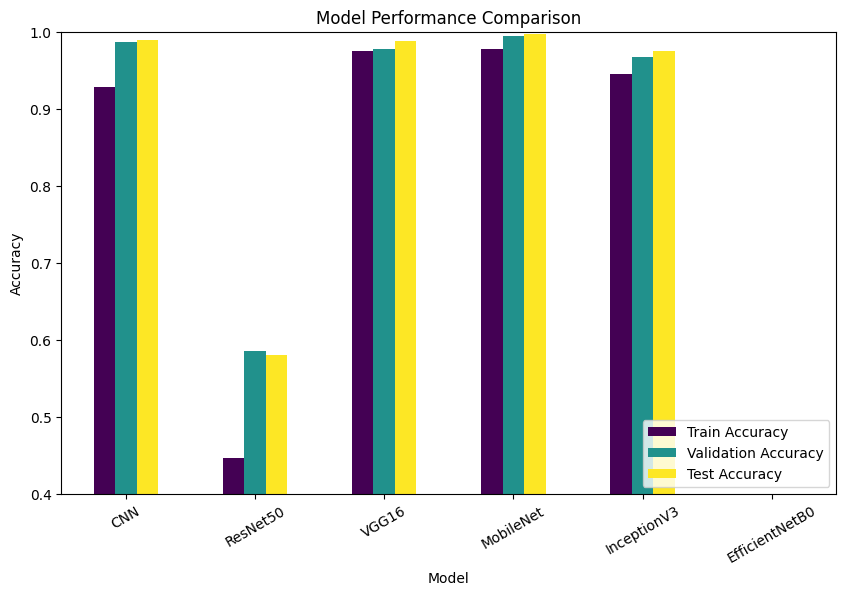

            Model  Train Accuracy  Validation Accuracy  Test Accuracy
0             CNN          0.9277               0.9863         0.9887
1        ResNet50          0.4470               0.5852         0.5808
2           VGG16          0.9745               0.9771         0.9881
3       MobileNet          0.9773               0.9945         0.9975
4     InceptionV3          0.9457               0.9670         0.9752
5  EfficientNetB0          0.1761               0.1712         0.1632


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names
model_names = ["CNN", "ResNet50", "VGG16", "MobileNet", "InceptionV3", "EfficientNetB0"]

# Add your training, validation, and test accuracy values here
train_accuracy = [0.9277, 0.447, 0.9745, 0.9773, 0.9457, 0.1761] 
val_accuracy = [0.9863, 0.5852, 0.9771, 0.9945, 0.9670, 0.1712]    
test_accuracy = [0.9887, 0.5808, 0.9881, 0.9975, 0.9752, 0.1632]   

# Create a DataFrame
df_results = pd.DataFrame({
    "Model": model_names,
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy,
    "Test Accuracy": test_accuracy
})

# 📊 Plot Training, Validation, and Test Accuracies
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.0)  # Adjust range if needed
plt.xticks(rotation=30)
plt.legend(loc="lower right")
plt.show()

# Display the DataFrame
print(df_results)


In [97]:
# no need this
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32  # Default batch size
BATCH_SIZE_VGG16 = 8  # VGG16-specific batch size

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_dir = "D:/Project/Multiclass_project/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Load test dataset
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# Load test dataset for VGG16
test_generator_vgg16 = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE_VGG16, class_mode='categorical', shuffle=False
)

# Extract class names
class_names = list(test_generator.class_indices.keys())

# Model names and paths
model_info = [
    ("CNN", "D:/Project/Multiclass_project/Model/fish_classification_cnn_model1.h5"),
    ("ResNet50", "D:/Project/Multiclass_project/Model/resnet50_fish_classifier.h5"),
    ("VGG16", "D:/Project/Multiclass_project/Model/VGG16_fish_classifier.h5"),
    ("MobileNet", "D:/Project/Multiclass_project/Model/mobilenet_fish_classifier.h5"),
    ("InceptionV3", "D:/Project/Multiclass_project/Model/InceptionV3_fish_classifier.h5"),
    ("EfficientNetB0", "D:/Project/Multiclass_project/Model/EfficientnetB0_fish_classifier.h5"),
]

# Store results
results = []

# Iterate through models
for model_name, model_path in model_info:
    print(f"Evaluating {model_name}...")

    # Load model with exception handling
    try:
        model = tf.keras.models.load_model(model_path, compile=False)
        print(f"{model_name} Model loaded successfully.")
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        continue  # Skip to the next model

    # Select the correct test generator
    test_gen = test_generator_vgg16 if model_name == "VGG16" else test_generator

    # Make predictions
    y_true = test_gen.classes  # True labels
    y_pred_probs = model.predict(test_gen)  # Predicted probabilities
    y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Extract precision, recall, F1-score, accuracy
    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1_score = report["macro avg"]["f1-score"]
    accuracy = report["accuracy"]

    # Store in results list
    results.append([model_name, accuracy, precision, recall, f1_score])

    # Plot confusion matrix for MobileNet
    if model_name == "MobileNet":
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title("Confusion Matrix - MobileNet")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Ensure DataFrame is not empty before plotting
if not df_results.empty:
    plt.figure(figsize=(10, 6))
    df_results.set_index("Model").plot(kind="bar", colormap="viridis", ax=plt.gca())
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=30)
    plt.legend(loc="lower right")
    plt.show()
else:
    print("No results available for plotting.")


Found 3187 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Evaluating CNN...
CNN Model loaded successfully.
100/100 [==============================] - 6s 59ms/step
Evaluating ResNet50...


c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

ResNet50 Model loaded successfully.


KeyboardInterrupt: 

In [96]:
import pandas as pd

for model_name, model_path in model_info:
    print(f"Evaluating {model_name}...")

    try:
        model = tf.keras.models.load_model(model_path, compile=False)
        print(f"{model_name} Model loaded successfully.")
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        continue

    test_gen = test_generator_vgg16 if model_name == "VGG16" else test_generator

    y_true = test_gen.classes
    y_pred_probs = model.predict(test_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)

    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Convert to DataFrame
    df_report = pd.DataFrame(report).transpose()

    # Save as CSV
    df_report.to_csv(f"D:/Project/Multiclass_project/Results/{model_name}_classification_report.csv")

    print(f"Saved {model_name} classification report.")


Evaluating CNN...
CNN Model loaded successfully.
100/100 [==============================] - 6s 55ms/step
Saved CNN classification report.
Evaluating ResNet50...


c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

ResNet50 Model loaded successfully.
100/100 [==============================] - 17s 166ms/step
Saved ResNet50 classification report.
Evaluating VGG16...


c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\loges\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

VGG16 Model loaded successfully.
399/399 [==============================] - 28s 70ms/step
Saved VGG16 classification report.
Evaluating MobileNet...
MobileNet Model loaded successfully.
100/100 [==============================] - 6s 52ms/step
Saved MobileNet classification report.
Evaluating InceptionV3...
InceptionV3 Model loaded successfully.
100/100 [==============================] - 6s 53ms/step
Saved InceptionV3 classification report.
Evaluating EfficientNetB0...
EfficientNetB0 Model loaded successfully.
100/100 [==============================] - 6s 52ms/step
Saved EfficientNetB0 classification report.


arresting class imbalance and retrain Mobilenet model

In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Path to Class 2 images
class_2_path = "D:/Project/Multiclass_project/Dataset2_for_class_imbalance/images.cv_jzk6llhf18tm3k0kyttxz/data/train/animal fish bass"

# Ensure directory exists
if not os.path.exists(class_2_path):
    print("Error: The specified directory does not exist.")
else:
    for img in os.listdir(class_2_path):
        img_path = os.path.join(class_2_path, img)

        # Check if it's an image file
        if img.lower().endswith((".jpg", ".jpeg", ".png")):
            img_array = load_img(img_path)  # Load image
            img_array = img_to_array(img_array)  # Convert to array
            img_array = img_array.reshape((1,) + img_array.shape)  # Reshape

            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_2_path, save_prefix="aug", save_format="jpeg"):
                i += 1
                if i > 20:  # Generate 20 new images per original image
                    break
    print("✅ Data augmentation completed for Class 2!")


✅ Data augmentation completed for Class 2!


Found 6835 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Epoch 1/10
214/214 [==============================] - 119s 550ms/step - loss: 0.7968 - accuracy: 0.7318 - val_loss: 0.1241 - val_accuracy: 0.9780
Epoch 2/10
214/214 [==============================] - 131s 611ms/step - loss: 0.2306 - accuracy: 0.9245 - val_loss: 0.0486 - val_accuracy: 0.9881
Epoch 3/10
214/214 [==============================] - 126s 587ms/step - loss: 0.1432 - accuracy: 0.9570 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 4/10
214/214 [==============================] - 131s 613ms/step - loss: 0.0998 - accuracy: 0.9687 - val_loss: 0.0277 - val_accuracy: 0.9927
Epoch 5/10
214/214 [==============================] - 129s 601ms/step - loss: 0.0899 - accuracy: 0.9713 - val_loss: 0.0199 - val_accuracy: 0.9918
Epoch 6/10
214/214 [==============================] - 127s 592ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0151 - val_accuracy: 0.

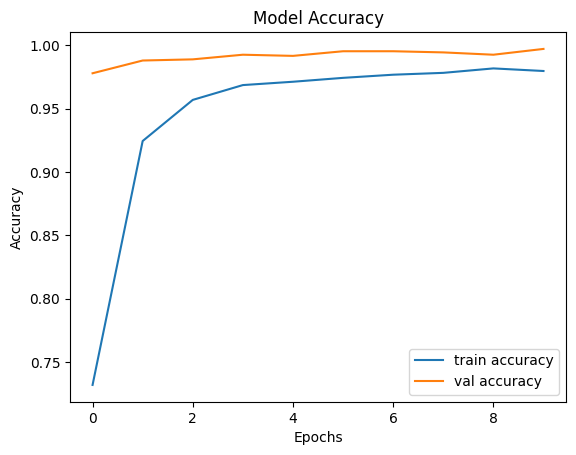

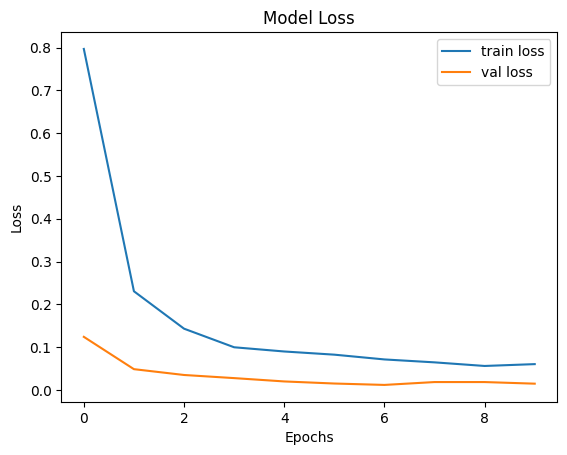

In [104]:
#retrain the model

# mobilenet

import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

dataset_path = "D:/Project/Multiclass_project/Dataset2_for_class_imbalance/images.cv_jzk6llhf18tm3k0kyttxz/data"

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Classification Report & Confusion Matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [105]:
# Save the model
model.save("D:/Project/Multiclass_project/Model/Mobilenet_update_fish_classifier.h5")

In [107]:
names=list(test_generator.class_indices.keys())
names

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']